In [167]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from scipy.constants import e, h, c
from scipy.signal import find_peaks
from matplotlib.ticker import MultipleLocator
from scipy.ndimage import gaussian_filter1d
from scipy.optimize import curve_fit

In [168]:
file_path = Path('Data/task 2 profile data.csv')
data = pd.read_csv(file_path, header=None, skiprows=3,sep=';', names=['x', 'y'])
#display(data)

In [169]:
# Smooth the data with a gaussian smooth
sigma = 1
smoothed_y = gaussian_filter1d(data['y'], sigma=sigma)
a = 1.9909e-9
b = 88.288e-9
c = -0.9342
d = 7.4257e-9

For the first part of task 2, grid spacing:

In [170]:
# Find peaks with the find_peaks function from scipy.signal
x, y = data['x'], data['y']
threshold = 7e-9
peaks_idx, props = find_peaks(y, height=threshold, distance=15)

# Extract corresponding x and y values
peaks_x = x.iloc[peaks_idx]
peaks_y = y[peaks_idx]
print(peaks_y)
peaks = pd.DataFrame({'x': peaks_x, 'y': peaks_y})
peaks = peaks.reset_index(drop=True)

peaks['Peak Distance'] = peaks['x'].diff()

pd.options.display.float_format= '{:.2e}'.format
display(peaks)
mean_peak_dist = peaks['Peak Distance'].mean()
print(f'Mean peak distance: {mean_peak_dist:.2e} m')
print(f'From fit parameters, peak-to-peak distance is {b:.2e} m')



10   9.10e-09
29   9.09e-09
53   9.29e-09
Name: y, dtype: float64


,x,y,Peak Distance
0,4.43e-08,9.10e-09,NaN
1,1.21e-07,9.09e-09,7.65e-08
2,2.17e-07,9.29e-09,9.66e-08


Mean peak distance: 8.65e-08 m
From fit parameters, peak-to-peak distance is 8.83e-08 m


In [171]:
# # Find peaks with the find_peaks function from scipy.signal
# x, y = data['x'], smoothed_y
# threshold = 7e-9
# peaks_idx, props = find_peaks(smoothed_y, height=threshold, distance=15)

# # Extract corresponding x and y values
# peaks_x = x.iloc[peaks_idx]
# peaks_y = y[peaks_idx]
# peaks = pd.DataFrame({'x': peaks_x, 'y': peaks_y})
# peaks = peaks.reset_index(drop=True)

# peaks['Peak Distance'] = peaks['x'].diff()
# peaks['Peak Height']=peaks['y'] - y.min()

# pd.options.display.float_format= '{:.2e}'.format
# display(peaks)
# mean_peak_dist = peaks['Peak Distance'].mean()
# print(f'Mean peak distance: {mean_peak_dist:.2e} m')



#### Fit line came from fitting function within Gwyddion

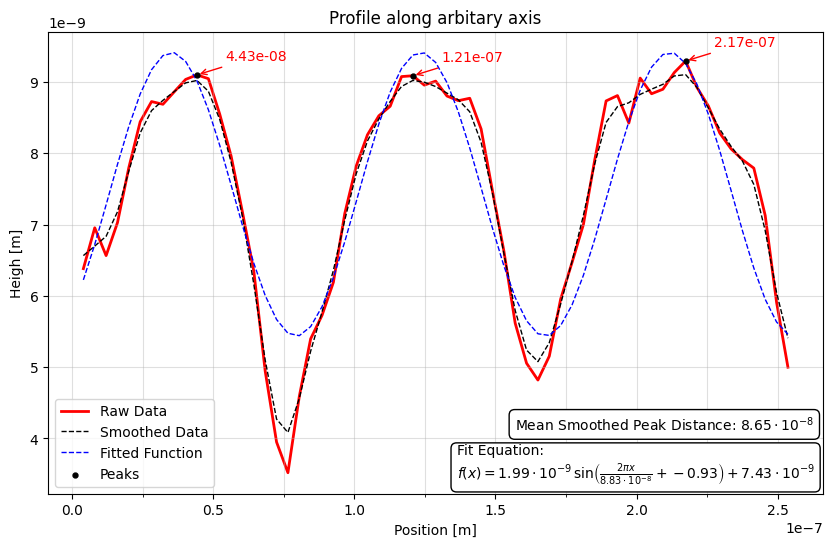

In [172]:
def latex_sci(num, precision=2):
    fmt = f"{{:.{precision}e}}"
    mant, exp = fmt.format(num).split("e")
    return rf"{mant} \cdot 10^{{{int(exp):d}}}"

string_raw = [a, b, c, d]
# string_latex = [latex_sci(num) for num in string_raw]
# a_latex = string_latex[0]
# b_latex = string_latex[1]
# c_latex = string_latex[2]
# d_latex = string_latex[3]


def fit_function(x, a, b, c, d):
    return a * np.sin(2 * np.pi * x / b + c) + d

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(data['x'], data['y'], label='Raw Data',
        color='red', ls='-', lw=2, zorder=1)
ax.plot(data['x'], smoothed_y, label='Smoothed Data',
        color='black', ls='--', lw=1, zorder=2)
ax.set_title('Profile along arbitary axis')
ax.set_xlabel('Position [m]')
ax.set_ylabel('Heigh [m]')

###########################################################
################# Vertical line for debug #################
#ax.axvline(x=88.288e-9, color='blue', linestyle='-', lw=1)
###########################################################

ax.plot(data['x'], fit_function(data['x'], a, b, c, d), color='blue', ls='--', lw=1, label='Fitted Function', zorder=3)
ax.scatter(peaks['x'], peaks['y'], color='black', label='Peaks', marker='.', s=50, zorder=4)
for x, y in zip(peaks_x, peaks_y):
    ax.annotate(f'{x:.2e}',
            xy=(x, y),
            xytext=((x + 0.1e-7, y + 2e-10)),
            arrowprops=dict(arrowstyle='->', color='red'),
            color='red'
    )

    
#############################################################
############ Plot the fit function in a text box ############
eq_text = (
    r'Fit Equation:' + '\n' +
    rf'$f(x) = {latex_sci(a)} \,\sin\!\left(\frac{{2\pi x}}{{{{{latex_sci(b)}}}}} + {c:.2f}\right) + {latex_sci(d)}$'
)
eq_text_2 = rf'Mean Smoothed Peak Distance: ${latex_sci(mean_peak_dist)}$'

plt.text(
    0.527, 0.11,
    eq_text,
    horizontalalignment='left',
    transform=plt.gca().transAxes,
    fontsize=10,
    verticalalignment='top', bbox=dict(boxstyle='round,pad=0.4', fc='white', edgecolor='black')
)

plt.text(
    0.602, 0.15,
    eq_text_2,
    horizontalalignment='left',
    transform=plt.gca().transAxes,
    fontsize=10,
    verticalalignment='center', bbox=dict(boxstyle='round,pad=0.4', fc='white', edgecolor='black')
)
ax.xaxis.set_major_locator(MultipleLocator(0.5e-7))
ax.xaxis.set_minor_locator(MultipleLocator(0.25e-7))
ax.grid(True, which='both', ls='-', alpha=0.4)
ax.legend()
plt.show()

In [173]:
file_path = Path('Data/task 2 drift data.csv')
drift_data = pd.read_csv(file_path, header=None, skiprows=3,sep=';', names=['x', 'y'])
x = drift_data['x'] * 1e7
y = drift_data['y'] * 1e9
drift_data['x'] = x
drift_data['y'] = y
#display(drift_data)

In [174]:
smoothed_y_drift = gaussian_filter1d(drift_data['y'], sigma=sigma)

# Find peaks with the find_peaks function from scipy.signal
drift_x, drift_y = drift_data['x'], drift_data['y']
threshold = 6
drift_peaks_idx, props = find_peaks(drift_y, height=threshold, distance=10)

# Extract corresponding x and y values
drift_peaks_x = drift_x.iloc[drift_peaks_idx]
drift_peaks_y = drift_y[drift_peaks_idx]
drift_peaks = pd.DataFrame({'x': drift_peaks_x, 'y': drift_peaks_y})
drift_peaks = drift_peaks.reset_index(drop=True)

drift_peaks_display = pd.DataFrame({'x': drift_peaks_x * 1e-7, 'y': drift_peaks_y * 1e-9})
drift_peaks_display['Peak Distance'] = drift_peaks_display['x'].diff()

pd.options.display.float_format= '{:.2e}'.format
display(drift_peaks_display)
mean_peak_dist = drift_peaks_display['Peak Distance'].mean()
print(f'Mean peak distance: {mean_peak_dist:.2e} m')



,x,y,Peak Distance
12,4.87e-08,8.78e-09,NaN
31,1.26e-07,9.18e-09,7.71e-08
51,2.07e-07,9.50e-09,8.12e-08
75,3.04e-07,8.80e-09,9.74e-08
93,3.77e-07,7.92e-09,7.31e-08
103,4.18e-07,8.64e-09,4.06e-08


Mean peak distance: 7.39e-08 m


In [175]:
# Find minima to break dataset into multiple regions and find fit curves for each region
minima=[]
inverted_threshold = -9
inverted_x, inverted_y = drift_data['x'], drift_data['y'] * -1
inverted_data = pd.DataFrame({'x': inverted_x, 'y': inverted_y})
minima_idx, props = find_peaks(inverted_data['y'], height=inverted_threshold, distance=15)
minima_idx = np.append(minima_idx, len(drift_x) - 1)
minima_x = inverted_x.iloc[minima_idx]
minima_y = inverted_y.iloc[minima_idx]

last_idx = len(drift_data) - 1
minima = pd.DataFrame({'x': minima_x, 'y': minima_y * -1})

display(minima)

,x,y
1,4.06e-02,3.64e+00
20,8.12e-01,2.93e+00
41,1.66e+00,3.67e+00
63,2.56e+00,5.00e+00
86,3.49e+00,3.93e+00
107,4.34e+00,6.70e+00
113,4.59e+00,2.74e+00


### Make sure you don't use the collapsed plot and stuff, use the one at the end
This is for the peak drift for task 2

I tried modeling the peaks with quadratic functions, but it wasn't a great fit. If we want to include that plot on the report, I can recreate it in about 3 seconds, just let me know if you think you want to.

In [176]:
def quad_func(x, a, x0, b):
    return a * (x - x0) ** 2 + b

segments = []
fit_params = []

for i in range(len(minima_idx) - 1):
    start_idx = minima_idx[i]
    end_idx = minima_idx[i + 1]

    segment = drift_data.iloc[start_idx:end_idx + 1]
    segments.append(segment)

    x = segment['x'].values
    y = segment['y'].values

    # Initial guesses: curvature, center, vertical shift
    a0 = -1
    x0 = x[np.argmax(y)] # guess vertex at lowest point
    b0 = max(y)
    #print(f'Initial guesses: \n a0={a0}, x0={x0}, b0={b0}')

    try:
        popt, _ = curve_fit(quad_func, x, y, p0=(a0, x0, b0))
        fit_params.append(popt)
        print(f"Segment {i+1}: a={popt[0]:.2f}, x0={popt[1]:.2f}, b={popt[2]:.2f}")
    except RuntimeError:
        print(f"Segment {i+1}: fit failed")
        fit_params.append(None)

Segment 1: a=-37.49, x0=0.41, b=9.10
Segment 2: a=-28.10, x0=1.28, b=8.95
Segment 3: a=-25.51, x0=2.15, b=9.68
Segment 4: a=-19.36, x0=3.02, b=8.77
Segment 5: a=-17.69, x0=4.02, b=8.63
Segment 6: a=-75.77, x0=4.35, b=6.77


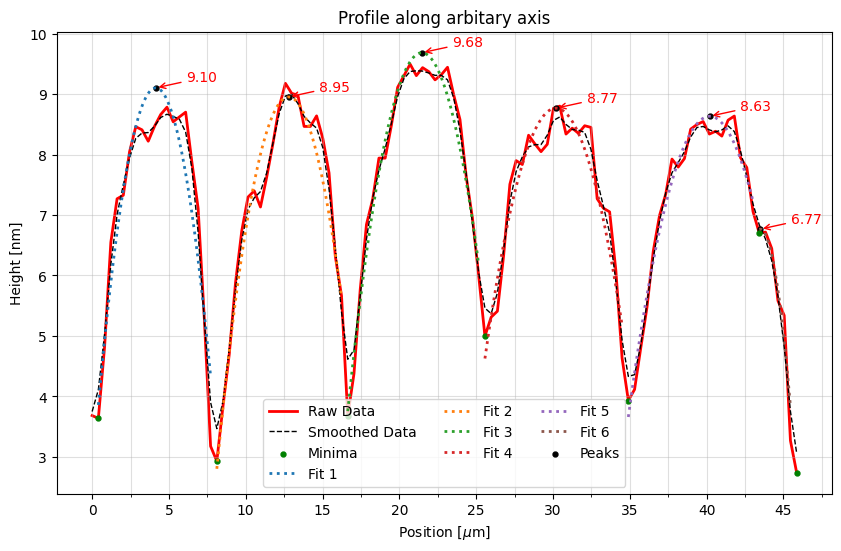

In [177]:
fig, ax = plt.subplots(figsize=(10,6))

###########################################################
###################### Plot raw data ######################
###########################################################
ax.plot(drift_data['x'] * 10, drift_data['y'], label='Raw Data',
        color='red', ls='-', lw=2, zorder=1)

###########################################################
################### Plot smoothed data ####################
###########################################################
ax.plot(drift_data['x'] * 10, smoothed_y_drift, label='Smoothed Data',
        color='black', ls='--', lw=1, zorder=2)
ax.set_title('Profile along arbitary axis')
ax.set_xlabel(r'Position [$\mu$m]')
ax.set_ylabel('Height [nm]')

###########################################################
################# Vertical line for debug #################
#ax.axvline(x=88.288e-9, color='blue', linestyle='-', lw=1)
###########################################################

ax.scatter(minima['x'] * 10, minima['y'], color='green', label='Minima', marker='.', s=50, zorder=5)

max_x_values = []
max_y_values = []
### Plot fit lines
drift_x = drift_data['x'].values
for i in range(len(minima_idx) - 1):
    start_idx = minima_idx[i]
    end_idx = minima_idx[i + 1]

    x_segment = drift_x[start_idx:end_idx]

    a, x0, b = fit_params[i]

    x_fit = np.linspace(x_segment[0], x_segment[-1], 300)
    y_fit = a * (x_fit - x0) ** 2 + b

    ax.plot(x_fit * 10, y_fit, ':', label=f'Fit {i+1}', zorder=6, lw=2)
    max_id = np.argmax(y_fit)
    x_fit = x_fit*10
    max_x_values.append(x_fit[max_id]) 
    max_y_values.append(y_fit[max_id])

### Plot drift peaks
ax.scatter(max_x_values, max_y_values, color='black', label='Peaks', marker='.', s=50, zorder=4)
for x, y in zip(max_x_values * 10, max_y_values):
    ax.annotate(f'{y:.2f}',
            xy=(x, y),
            xytext=((x + 2, y + .1)),
            arrowprops=dict(arrowstyle='->', color='red'),
            color='red'
    )


#############################################################
############ Plot the fit function in a text box ############
# eq_text = (
#     r'Fit Equation:' + '\n' +
#     rf'$f(x) = {latex_sci(a)} \,\sin\!\left(\frac{{2\pi x}}{{{{{latex_sci(b)}}}}} + {c:.2f}\right) + {latex_sci(d)}$'
# )
# eq_text_2 = rf'Mean Smoothed Peak Distance: ${latex_sci(mean_peak_dist)}$'

# plt.text(
#     0.527, 0.11,
#     eq_text,
#     horizontalalignment='left',
#     transform=plt.gca().transAxes,
#     fontsize=10,
#     verticalalignment='top', bbox=dict(boxstyle='round,pad=0.4', fc='white', edgecolor='black')
# )

# plt.text(
#     0.602, 0.15,
#     eq_text_2,
#     horizontalalignment='left',
#     transform=plt.gca().transAxes,
#     fontsize=10,
#     verticalalignment='center', bbox=dict(boxstyle='round,pad=0.4', fc='white', edgecolor='black')
# )


ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_minor_locator(MultipleLocator(2.5))
ax.grid(True, which='both', ls='-', alpha=0.4)
ax.legend(ncol=3)
plt.show()

In [178]:
max_x_values = [x * 1e-7 for x in max_x_values]
max_y_values = [y * 1e-9 for y in max_y_values]
max_drift_values = pd.DataFrame({'x': max_x_values, 'y': max_y_values})
max_drift_values['Peak Difference'] = max_drift_values['y'].diff() * 1e-9
display(max_drift_values)

,x,y,Peak Difference
0,4.14e-07,9.10e-09,NaN
1,1.28e-06,8.95e-09,-1.50e-19
2,2.15e-06,9.68e-09,7.31e-19
3,3.02e-06,8.77e-09,-9.17e-19
4,4.02e-06,8.63e-09,-1.34e-19
5,4.35e-06,6.77e-09,-1.87e-18


In [179]:
file_path = Path('Data/task 2 drift data 2.csv')
drift_data2 = pd.read_csv(file_path, header=None, skiprows=3,sep=';', names=['x', 'y'])
#display(drift_data2)


In [180]:
# Find peaks with the find_peaks function from scipy.signal
x, y = drift_data2['x'], drift_data2['y']
threshold = 7e-9
peaks_idx, props = find_peaks(y, height=threshold, distance=15)

# Extract corresponding x and y values
drift2_peaks_x = x.iloc[peaks_idx]
drift2_peaks_y = y[peaks_idx]
drift2_peaks = pd.DataFrame({'x': drift2_peaks_x, 'y': drift2_peaks_y})
drift2_peaks = drift2_peaks.reset_index(drop=True)

drift2_peaks['Height Drift'] = drift2_peaks['y'].diff()

pd.options.display.float_format= '{:.2e}'.format
display(drift2_peaks)
mean_peak_drift = drift2_peaks['Height Drift'].mean()
print(f'Mean peak drift: {mean_peak_drift:.2e} m')


,x,y,Height Drift
0,7.68e-08,9.97e-09,NaN
1,1.70e-07,9.96e-09,-9.88e-12
2,2.47e-07,9.47e-09,-4.92e-10
3,3.48e-07,9.39e-09,-8.16e-11
4,4.41e-07,8.74e-09,-6.44e-10


Mean peak drift: -3.07e-10 m


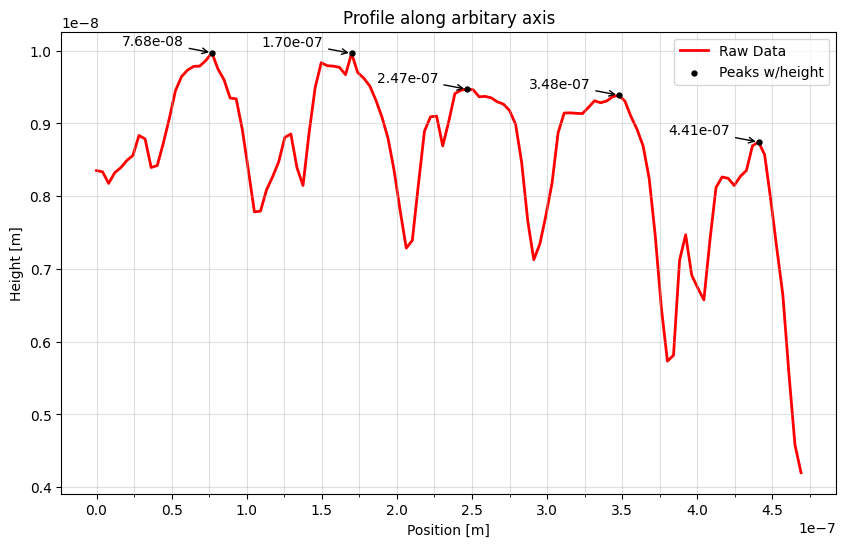

: 

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(drift_data2['x'], drift_data2['y'], label='Raw Data',
        color='red', ls='-', lw=2, zorder=1)
# ax.plot(drift_data2['x'], smoothed_y, label='Smoothed drift_Data2',
#         color='black', ls='--', lw=1, zorder=2)
ax.set_title('Profile along arbitary axis')
ax.set_xlabel('Position [m]')
ax.set_ylabel('Height [m]')

###########################################################
################# Vertical line for debug #################
#ax.axvline(x=88.288e-9, color='blue', linestyle='-', lw=1)
###########################################################

ax.scatter(drift2_peaks['x'], drift2_peaks['y'], color='black', label='Peaks w/height', marker='.', s=50, zorder=4)
for x, y in zip(drift2_peaks_x, drift2_peaks_y):
    ax.annotate(f'{x:.2e}',
            xy=(x, y),
            xytext=((x - .6e-7, y + 1e-10)),
            arrowprops=dict(arrowstyle='->', color='black'),
            color='black'
    )

ax.xaxis.set_major_locator(MultipleLocator(0.5e-7))
ax.xaxis.set_minor_locator(MultipleLocator(0.25e-7))
ax.grid(True, which='both', ls='-', alpha=0.4)
ax.legend()
plt.show()